#### Problem Statement

#### Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

#### They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

#### They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


 

# To predict an employee can be recommended for a promotion

In [3]:
#Load the libraries

In [121]:
import numpy as np
import pandas as pd

import seaborn as sns

In [5]:
# Load the dataset

In [6]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')
submission = pd.read_csv('sample_submission_M0L0uXE.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
train.shape

(54808, 14)

In [12]:
train.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [13]:
train.select_dtypes(exclude='object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


In [14]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [15]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [16]:
train['department'].nunique()

9

In [18]:
test.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77


In [19]:
test.shape

(23490, 13)

In [21]:
train.columns, test.columns

(Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score', 'is_promoted'],
       dtype='object'),
 Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score'],
       dtype='object'))

In [22]:
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [23]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [25]:
train.duplicated().sum()

0

In [ ]:
1. fill the null values
2. remove the null values

In [26]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [29]:
36669 +14925+805, train.shape[0], train['education'].isna().sum()

(52399, 54808, 2409)

In [30]:
train['education'].value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [32]:
train['education'].value_counts(dropna=False, normalize=True)*100

Bachelor's          66.904467
Master's & above    27.231426
NaN                  4.395344
Below Secondary      1.468764
Name: education, dtype: float64

In [34]:
train['previous_year_rating'].value_counts(dropna=False,normalize=True)*100

3.0    33.969494
5.0    21.422055
4.0    18.021092
1.0    11.354182
2.0     7.708729
NaN     7.524449
Name: previous_year_rating, dtype: float64

In [35]:
train['previous_year_rating'].value_counts(normalize=True)*100

3.0    36.733486
5.0    23.165101
4.0    19.487412
1.0    12.278036
2.0     8.335964
Name: previous_year_rating, dtype: float64

In [36]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [38]:
test[test['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,NaN,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48
23424,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87
23452,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83
23459,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52


In [39]:
test[test['education'].isna()==False]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [40]:
test[test['education']!='NaN']

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [43]:
test[test['education'].notna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [45]:
data=pd.concat([train,test])

train.shape, test.shape, data.shape

((54808, 14), (23490, 13), (78298, 14))

In [162]:
display(train.head(1), train.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [164]:
display(test.head(1), test.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [152]:
# before resetting the index
display(data.head(1), data.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23489,5973,Technology,region_17,Master's & above,1,other,3,40,5.0,5,1,0,89,NaN


In [153]:
# after resetting the index
data.reset_index(inplace=True, drop=True)
display(data.head(1), data.tail(1))

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78297,5973,Technology,region_17,Master's & above,1,other,3,40,5.0,5,1,0,89,NaN


In [154]:
train.shape[0], test.shape[0], train.shape[0]+test.shape[0], data.shape[0]

(54808, 23490, 78298, 78298)

In [47]:
data['is_promoted'].value_counts(dropna=False)

0.0    50140
NaN    23490
1.0     4668
Name: is_promoted, dtype: int64

In [48]:
data['is_promoted'].isna().sum()

23490

In [49]:
data['is_promoted'].notna().sum()

54808

In [50]:
data['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [51]:
data['education'].value_counts(dropna=False,normalize=True)*100

Bachelor's          66.728397
Master's & above    27.368515
NaN                  4.397303
Below Secondary      1.505786
Name: education, dtype: float64

In [52]:
data['education'].fillna('unknown',inplace=True)

In [53]:
data['education'].value_counts(dropna=False,normalize=True)*100

Bachelor's          66.728397
Master's & above    27.368515
unknown              4.397303
Below Secondary      1.505786
Name: education, dtype: float64

In [54]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [58]:
data[data['previous_year_rating'].isna()]['length_of_service'].unique()

array([1], dtype=int64)

In [62]:
data[data['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,unknown,m,sourcing,1,30,NaN,1,0,0,77,0.0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0.0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0.0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0.0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23406,53291,Operations,region_4,Bachelor's,m,sourcing,1,32,NaN,1,1,0,62,NaN
23436,10138,Technology,region_2,Bachelor's,f,referred,1,29,NaN,1,0,0,79,NaN
23445,65765,Analytics,region_31,Bachelor's,m,sourcing,3,28,NaN,1,0,0,86,NaN
23479,39410,Sales & Marketing,region_2,Bachelor's,m,other,3,20,NaN,1,0,0,49,NaN


In [63]:
data['previous_year_rating'].fillna(0,inplace=True)

In [65]:
data['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0.0     5936
Name: previous_year_rating, dtype: int64

In [66]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [67]:
data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing
23486,Technology,region_25,Bachelor's,m,sourcing
23487,HR,region_16,Bachelor's,f,sourcing
23488,Procurement,region_31,Bachelor's,m,sourcing


In [84]:
[print(i, data[i].unique()) for i in data.select_dtypes(include='object').columns]

department ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education ["Master's & above" "Bachelor's" 'unknown' 'Below Secondary']
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']


[None, None, None, None, None]

In [86]:
data['department'].unique()
#data[i].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [87]:
for i in data.select_dtypes(include='object').columns:
    print(i)

department
region
education
gender
recruitment_channel


In [89]:
data['gender'] = data['gender'].replace({'f':0,'m':1})

In [92]:
data['gender'].unique()

array([0, 1], dtype=int64)

In [93]:
data.select_dtypes(include='object').columns

Index(['department', 'region', 'education', 'recruitment_channel'], dtype='object')

In [157]:
encoded_data = pd.get_dummies(data, columns=['department', 'region', 'education', 'recruitment_channel'])
print(encoded_data.shape)
encoded_data.head(2)

(78298, 60)


,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,1,0,0,0,0,1,0,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,0,0,0,1,0,0,0,1,0,0


In [95]:
encoded_data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

In [96]:
# univariate analysis

<AxesSubplot:>

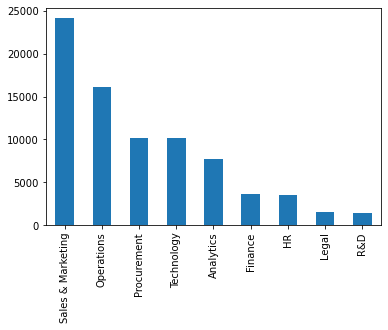

In [97]:
data['department'].value_counts().plot(kind='bar')

<AxesSubplot:>

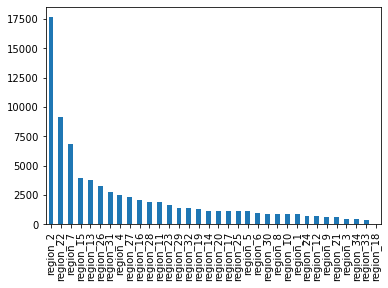

In [98]:
data['region'].value_counts().plot(kind='bar')

<AxesSubplot:>

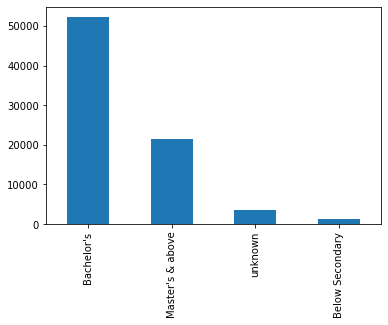

In [99]:
data['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

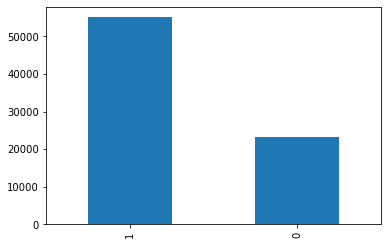

In [100]:
data['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

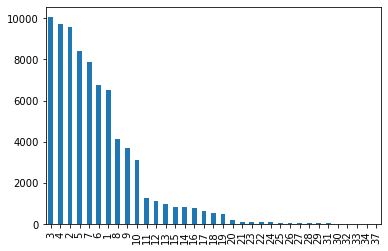

In [101]:
data['length_of_service'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

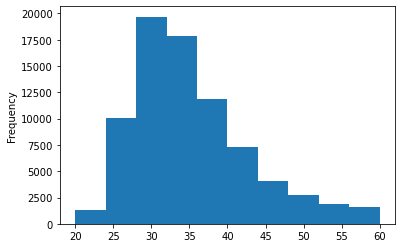

In [103]:
data['age'].plot(kind='hist')

In [106]:
data['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

<AxesSubplot:>

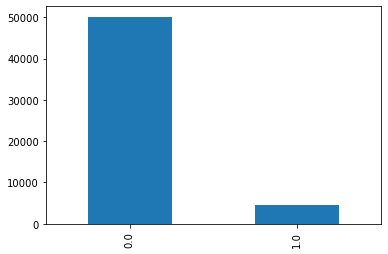

In [107]:
data['is_promoted'].value_counts().plot(kind='bar')

In [108]:
#bivariate analysis

<AxesSubplot:xlabel='is_promoted'>

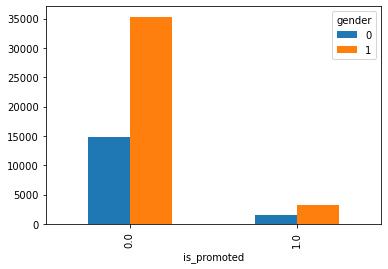

In [109]:
pd.crosstab(data['is_promoted'],data['gender']).plot(kind='bar')

<AxesSubplot:xlabel='is_promoted'>

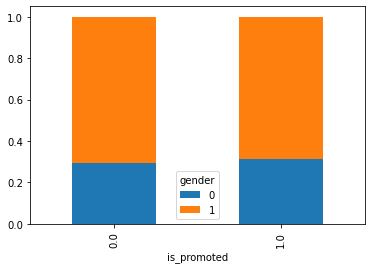

In [110]:
gender = pd.crosstab(data['is_promoted'],data['gender'])
gender.div(gender.sum(1),axis=0).plot(kind='bar',stacked=True)

In [117]:
def bivariate_percent_plt(x,y):
    cross = pd.crosstab(x,y)
    cross.div(cross.sum(1),axis=0).plot(kind='bar',stacked=True)

In [112]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

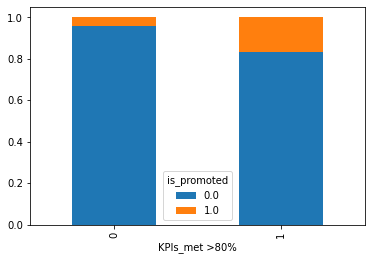

In [118]:
bivariate_percent_plt(data['KPIs_met >80%'],data['is_promoted'])

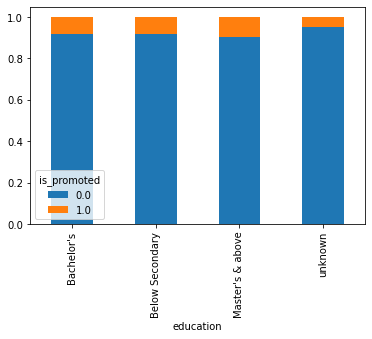

In [116]:
bivariate_percent_plt(data['education'],data['is_promoted'])

In [125]:
data.drop(columns=['employee_id']).corr()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
gender,1.000000,0.084530,-0.017816,-0.024587,-0.017800,-0.037916,0.000553,-0.024840,-0.011109
no_of_trainings,0.084530,1.000000,-0.082536,-0.062046,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,-0.017816,-0.082536,1.000000,0.181352,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,-0.024587,-0.062046,0.181352,1.000000,0.193161,0.273625,0.021647,0.055040,0.125991
length_of_service,-0.017800,-0.058403,0.653339,0.193161,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,-0.037916,-0.043912,-0.026223,0.273625,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.000553,-0.004818,-0.007357,0.021647,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.024840,0.044180,-0.044592,0.055040,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,-0.011109,-0.024896,-0.017166,0.125991,-0.010670,0.221582,0.195871,0.181147,1.000000


In [127]:
data[['gender','is_promoted']].corr()

,gender,is_promoted
gender,1.000000,-0.011109
is_promoted,-0.011109,1.000000


In [138]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:>

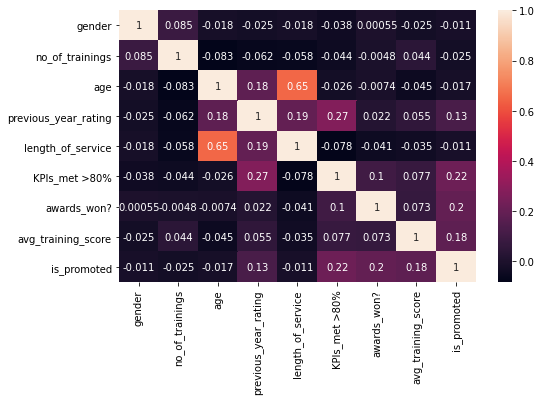

In [132]:
plt.figure(figsize=(8,5))
sns.heatmap(data.drop(columns=['employee_id']).corr(),annot=True)

In [133]:
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0


In [137]:
data.drop(columns=['employee_id']).describe().T

,count,mean,std,min,25%,50%,75%,max
gender,78298.0,0.703620,0.456664,0.0,0.0,1.0,1.0,1.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.0,1.0,1.0,10.0
age,78298.0,34.797619,7.665928,20.0,29.0,33.0,39.0,60.0
previous_year_rating,78298.0,3.079593,1.499173,0.0,2.0,3.0,4.0,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,78298.0,0.354032,0.478222,0.0,0.0,0.0,1.0,1.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.0,0.0,0.0,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [140]:
encoded_data.select_dtypes(exclude='object').columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

In [155]:
mmsc = MinMaxScaler()
scaled_data = mmsc.fit_transform(encoded_data[['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score']])
scaled_data = pd.DataFrame(scaled_data, columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])
print(scaled_data.shape)
scaled_data.head(3)

(78298, 7)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.0,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.0,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.0,0.350,0.6,0.166667,0.0,0.0,0.183333


In [158]:
preprocessed_data = pd.concat([scaled_data, encoded_data.drop(columns=['no_of_trainings', 'age','previous_year_rating', 'length_of_service', 'KPIs_met >80%','awards_won?', 'avg_training_score'])],axis=1)
preprocessed_data.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,1,0,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,1,0.0,...,0,0,0,1,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,1,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,1,0.0,...,0,0,0,1,0,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,1,0.0,...,0,0,0,1,0,0,0,1,0,0


In [161]:
display(preprocessed_data.head(1), preprocessed_data.tail(1))

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,1,0,0,0,0,1,0,0,0,1


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
78297,0.222222,0.5,1.0,0.111111,1.0,0.0,0.833333,5973,1,NaN,...,0,0,0,0,0,1,0,1,0,0


In [147]:
encoded_data

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0.0,...,1,0,0,0,0,1,0,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0.0,...,0,0,0,1,0,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0.0,...,0,0,0,1,0,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0.0,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,1,1,24,3.0,1,0,0,61,NaN,...,0,0,0,0,1,0,0,0,0,1
23486,25600,1,1,31,3.0,7,0,0,74,NaN,...,0,0,0,1,0,0,0,0,0,1
23487,45409,0,1,26,4.0,4,0,0,50,NaN,...,0,0,0,1,0,0,0,0,0,1
23488,1186,1,3,27,0.0,1,0,0,70,NaN,...,0,0,0,1,0,0,0,0,0,1


In [180]:
preprc_train = preprocessed_data[preprocessed_data['is_promoted'].notna()]
preprc_test = preprocessed_data[preprocessed_data['is_promoted'].isna()]

In [181]:
preprc_train.to_csv('preprocessed_train_data.csv',index=False)
preprc_test.to_csv('preprocessed_test_data.csv',index=False)

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [182]:
pptrain = pd.read_csv('preprocessed_train_data.csv')

In [183]:
pptrain

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,employee_id,gender,is_promoted,...,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,65438,0,0.0,...,1,0,0,0,0,1,0,0,0,1
1,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,65141,1,0.0,...,0,0,0,1,0,0,0,1,0,0
2,0.000000,0.350,0.6,0.166667,0.0,0.0,0.183333,7513,1,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.111111,0.475,0.2,0.250000,0.0,0.0,0.183333,2542,1,0.0,...,0,0,0,1,0,0,0,1,0,0
4,0.000000,0.625,0.6,0.027778,0.0,0.0,0.566667,48945,1,0.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.000000,0.700,0.6,0.444444,0.0,0.0,0.650000,3030,1,0.0,...,0,0,0,1,0,0,0,0,0,1
54804,0.000000,0.425,0.4,0.138889,0.0,0.0,0.283333,74592,0,0.0,...,0,0,0,0,0,1,0,1,0,0
54805,0.000000,0.175,1.0,0.055556,1.0,0.0,0.666667,13918,1,0.0,...,0,0,0,1,0,0,0,1,0,0
54806,0.000000,0.225,0.2,0.027778,0.0,0.0,0.100000,13614,1,0.0,...,0,0,1,0,0,0,1,0,0,1


In [184]:
X = pptrain.drop(columns=['employee_id','is_promoted'])
y = pptrain['is_promoted']

In [185]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((43846, 58), (10962, 58), (43846,), (10962,))

In [186]:
train_X.shape[0], test_X.shape[0], train_X.shape[0]+ test_X.shape[0], preprc.shape[0]

(43846, 10962, 54808, 78298)

In [187]:
train_y.isna().sum()

0

In [189]:
model = LogisticRegression(max_iter=500)
model.fit(train_X,train_y)

LogisticRegression(max_iter=500)

In [191]:
model.coef_, model.intercept_

(array([[-1.29485858, -1.10111487,  0.80681413,  0.75021116,  1.76779199,
          1.4292679 , 16.09288192,  0.05864007, -4.55619741,  1.59939412,
          4.0248969 ,  1.30718023,  1.773304  , -0.68486823, -4.96368455,
          4.52886061, -3.01654178,  0.23077088,  0.17782074, -0.34731911,
         -0.16917769,  0.1465375 ,  0.02907222,  0.14292086, -0.0370361 ,
          0.68527723, -0.33824426, -0.06082664,  0.18963606, -0.18999237,
         -0.37479831,  0.52831229,  0.45074094, -0.18563921,  0.50336872,
         -0.0443126 ,  0.1363333 ,  0.50144742, -0.42199476,  0.3575158 ,
          0.28632323, -0.16930164, -0.33326354, -0.3805094 , -0.81019529,
          0.65587483, -0.15132607, -0.37480389,  0.42246261, -0.07096447,
         -0.97236539,  0.04301008,  0.0970851 ,  0.19834552, -0.32609682,
          0.06228168, -0.0947636 ,  0.0448258 ]]),
 array([-11.85619439]))

In [192]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

accuracy score 0.9316243214888473
f1 score 0.379809681423252
confusion matrix
 [[39930   156]
 [ 2842   918]]


In [193]:
y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.9325852946542602
f1 score 0.3667523564695801
confusion matrix
 [[10009    45]
 [  694   214]]


In [194]:
pptest_org = pd.read_csv('preprocessed_test_data.csv')

In [197]:
pptest_X = pptest_org.drop(columns=['employee_id','is_promoted'])
y_unpred = model.predict(pptest_X)

In [200]:
np.unique(y_unpred, return_counts=True)

(array([0., 1.]), array([22939,   551], dtype=int64))

In [204]:
submission.head(1), submission.tail(1)

(   employee_id  is_promoted
 0         8724          0.0,
        employee_id  is_promoted
 23489         5973          1.0)

In [206]:
submission['is_promoted']=y_unpred
submission['is_promoted']=submission['is_promoted'].astype(int)
submission.to_csv('submission_logreg1.csv',index=False)

In [208]:
np.unique(submission['is_promoted'], return_counts=True)

(array([0, 1]), array([22939,   551], dtype=int64))

In [203]:
test.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77


In [205]:
test.tail(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [211]:
not_promoted = pptrain[pptrain['is_promoted']==0]
promoted = pptrain[pptrain['is_promoted']==1]
promoted.shape, not_promoted.shape, pptrain['is_promoted'].value_counts()

((4668, 60),
 (50140, 60),
 0.0    50140
 1.0     4668
 Name: is_promoted, dtype: int64)

In [214]:
promoted_over = promoted.sample(not_promoted.shape[0],replace=True)
ovrsmp_prc_train = pd.concat([not_promoted,promoted_over],axis=0)
ovrsmp_prc_train.shape, ovrsmp_prc_train['is_promoted'].value_counts()

((100280, 60),
 0.0    50140
 1.0    50140
 Name: is_promoted, dtype: int64)

In [215]:
X = ovrsmp_prc_train.drop(columns=['employee_id','is_promoted'])
y = ovrsmp_prc_train['is_promoted']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

model = LogisticRegression(max_iter=500)
model.fit(train_X,train_y)

y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Train accuracy
accuracy score 0.7933910051854807
f1 score 0.800543916439032
confusion matrix
 [[30386  9586]
 [ 6989 33263]]
Test accuracy
accuracy score 0.7925309134423614
f1 score 0.7962990160082244
confusion matrix
 [[7762 2406]
 [1755 8133]]


In [216]:
pptest_X = pptest_org.drop(columns=['employee_id','is_promoted'])
y_unpred = model.predict(pptest_X)

submission['is_promoted']=y_unpred
submission['is_promoted']=submission['is_promoted'].astype(int)
submission.to_csv('submission_logreg1_ovrsampling.csv',index=False)